In [1]:
from analysis import Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
PATH100_BATCH2 = "F:\Thesis\Experiments\Costs\Results\/25-06-2022 Batch-2 100.csv"
PATH100_BATCH3 = "F:\Thesis\Experiments\Costs\Results\/27-06-2022 Batch-3 100.csv"
PATHME_BATCH2 = "F:\Thesis\Experiments\Costs\Results\/24-06-2022 Batch-2 ME.csv"
PATHME_BATCH3 = "F:\Thesis\Experiments\Costs\Results\/27-06-2022 Batch-3 ME.csv"
PATHME_BATCH4 = "F:\Thesis\Experiments\Costs\Results\/28-06-2022 Batch-4 ME.csv"
data100_batch2 = pd.read_csv(PATH100_BATCH2)
data100_batch3 = pd.read_csv(PATH100_BATCH3)
datame_batch2 = pd.read_csv(PATHME_BATCH2)
datame_batch3 = pd.read_csv(PATHME_BATCH3)
datame_batch4 = pd.read_csv(PATHME_BATCH4)
data100 = pd.concat([data100_batch2, data100_batch3], ignore_index=True)
datame = pd.concat([datame_batch2, datame_batch3, datame_batch4], ignore_index=True)

data100 = Analysis.append_durations(data100)
datame = Analysis.append_durations(datame)
print("fast subjects ME: ", datame['duration'].isnull().values.any())
print("fast subjects 100: ", data100['duration'].isnull().values.any())

s100_data = Analysis.convert_100_data(data100)
mes_data = Analysis.convert_me_data(datame)

print("subjects that failed the attention checks in the ME survey: ", mes_data['attention_checks_passed'].loc[mes_data['attention_checks_passed'] == False].values.any())
print("subjects that failed the attention checks in the 100-level survey: ", s100_data['attention_checks_passed'].loc[s100_data['attention_checks_passed'] == False].values.any())


fast subjects ME:  False
fast subjects 100:  False
subjects that failed the attention checks in the ME survey:  False
subjects that failed the attention checks in the 100-level survey:  False


In [2]:
print(s100_data)
print(mes_data)

      TP1    TP2    TP3    TP4    TP5    TP6    TP7    TP8    TN1    TN2  ...  \
0    80.0   89.0   87.0    0.0   77.0   90.0   60.0   85.0   75.0   60.0  ...   
1   100.0  100.0  100.0  -15.0  100.0  100.0   25.0   90.0  -20.0  100.0  ...   
2    90.0  100.0  100.0   70.0  100.0   96.0   90.0  100.0   90.0   90.0  ...   
3   100.0  100.0   95.0 -100.0  100.0   98.0   98.0   90.0   99.0   96.0  ...   
4   -90.0  100.0  100.0  100.0  100.0    0.0  -30.0  100.0  100.0  -90.0  ...   
5   100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  ...   
6   -95.0   98.0   99.0  -67.0    1.0 -100.0  -99.0   98.0    1.0   99.0  ...   
7    88.0   23.0   11.0  -21.0   79.0   93.0   -8.0   69.0   84.0   98.0  ...   
8     0.0    0.0   52.0  -23.0   70.0   50.0  -72.0   86.0   90.0    0.0  ...   
9    70.0    0.0  100.0   52.0  100.0  -35.0   97.0   97.0   66.0  100.0  ...   
10   89.0  -64.0   83.0  -67.0   89.0   92.0  -77.0  -69.0  -78.0   76.0  ...   
11   64.0  100.0  100.0   90

In [3]:
print("ME scale")
Analysis.print_means(mes_data)
print("100-level scale")
Analysis.print_means(s100_data)


ME scale
TP 25.918418
TN 39.803605
FP -25.771068
FN -33.822411
REJ -16.081677
100-level scale
TP 49.783333
TN 60.558333
FP -45.145833
FN -49.820833
REJ -21.875


In [4]:
Analysis.print_reliabilities(mes_data, scale="ME")

Reliability scale:  0.7799353310345875
TP 0.06642454307046264
TN 0.09947271297584492
FP 0.39314678266051883
FN 0.9194940763976943
REJ -0.31122839546794645


In [5]:
Analysis.print_reliabilities(s100_data, scale="S100")


Reliability scale:  0.44399096616566747
TP 0.04376074544823105
TN 0.08509128250554221
FP 0.041299778764945394
FN 0.09751793396438557
REJ 0.12306150508487357


In [6]:
Analysis.print_statistics(data_mes=mes_data, data_s100=s100_data)

Cohen's d -0.016338293882650973
Shapiro Wilk normality test MES:  ShapiroResult(statistic=0.9391598105430603, pvalue=0.0323997363448143)
Shapiro Wilk normality test S100:  ShapiroResult(statistic=0.9273179769515991, pvalue=0.013178938068449497)
Bartlett's test for equal variances:   BartlettResult(statistic=8.39178513787846, pvalue=0.0037692055400796952)
Mann-Whitney U test:  MannwhitneyuResult(statistic=834.0, pvalue=0.747184603942994)
Unpaired T-test:  Ttest_indResult(statistic=-0.07214795226768025, pvalue=0.9426688469337343)
Pearson:  (0.975151501618526, 1.7647016806159975e-26)
Spearman:  SpearmanrResult(correlation=0.9647279549718575, pvalue=1.25288104196636e-23)
Kendall:  KendalltauResult(correlation=0.8538461538461539, pvalue=8.520504344025439e-15)


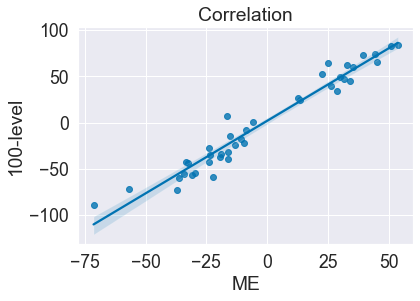

In [7]:
%matplotlib inline
sns.set_theme(style="whitegrid")
sns.set(font_scale = 1.6, palette="colorblind")
Analysis.plot_validity(data_mes=mes_data, data_s100=s100_data)

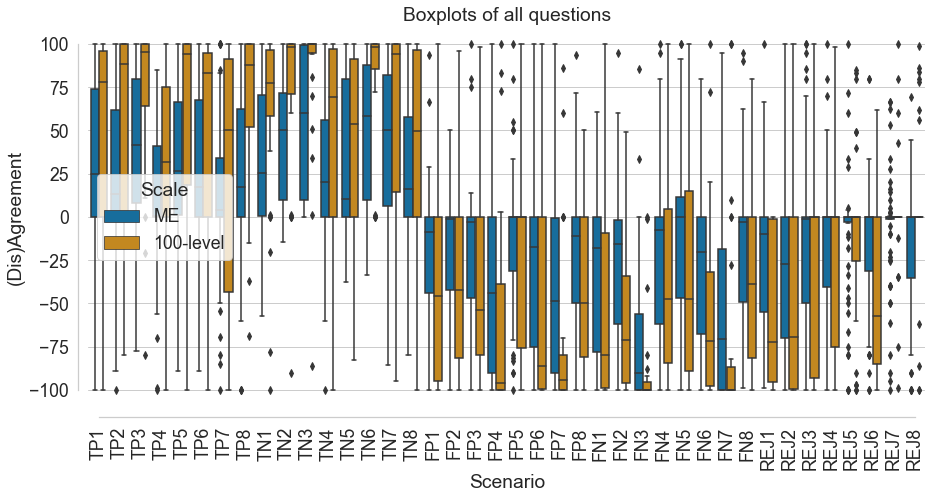

In [8]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_dual_boxplots(data_mes=mes_data, data_s100=s100_data)

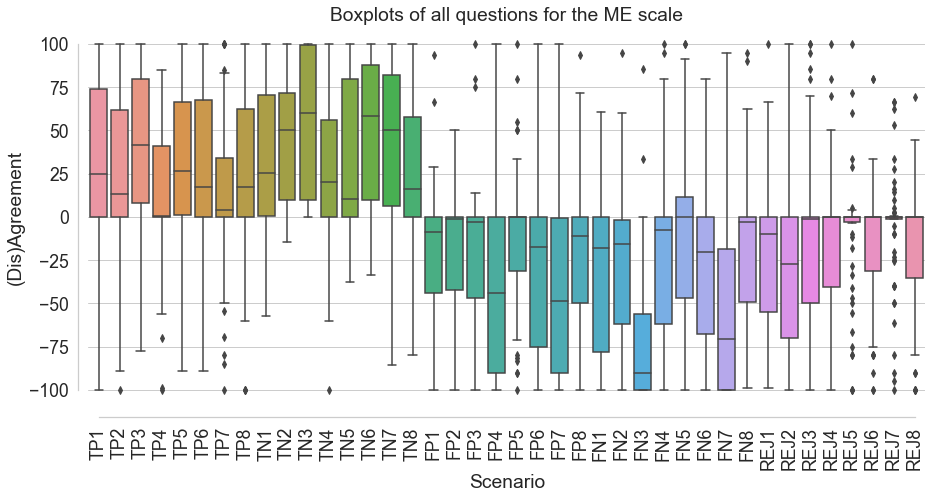

In [9]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=mes_data, scale_title="ME")

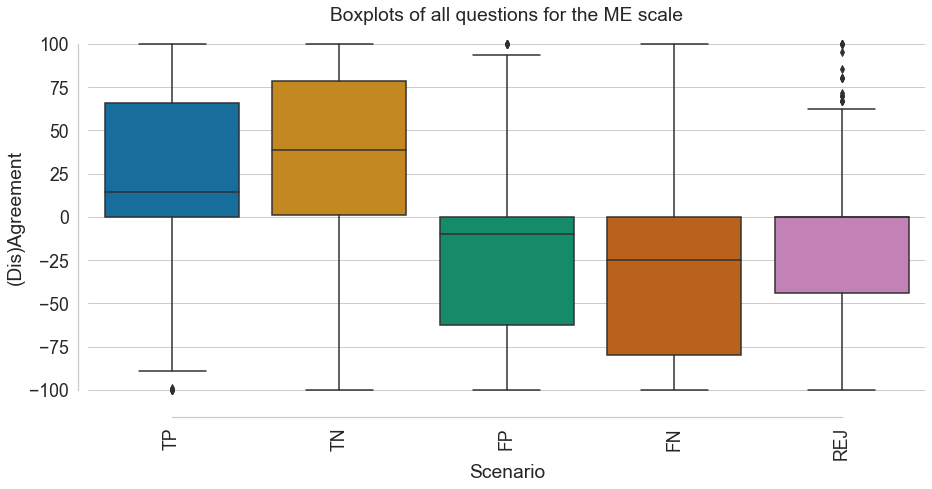

In [10]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=mes_data, scale_title="ME", show_individual=False)

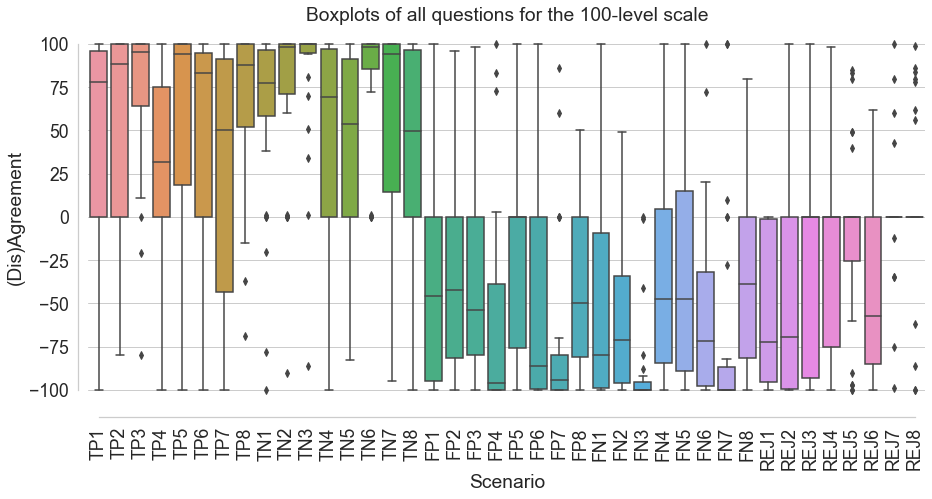

In [11]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=s100_data, scale_title="100-level")

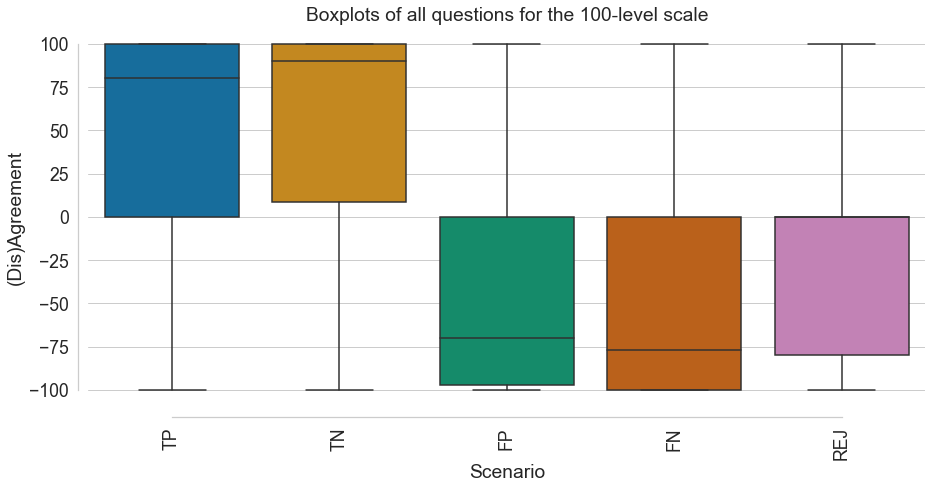

In [12]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=s100_data, scale_title="100-level", show_individual=False)

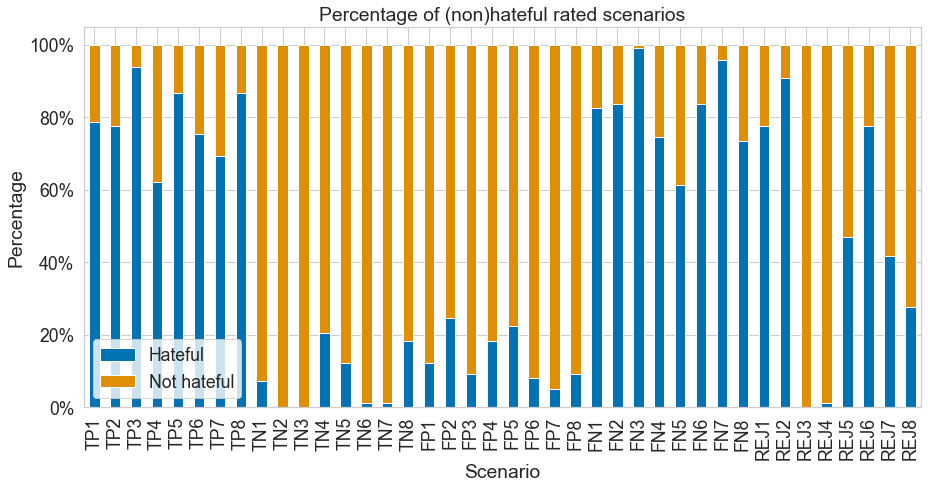

In [13]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_hatefulness(data_mes=mes_data, data_s100=s100_data)